In [1]:
# 시계열 데이터 : 연속적인 시간에 따라 다르게 측정데이터
# arima 모델 => statsmodel 모듈 이용
# ar 과거정보기준
# ma 이전정보의 오차를 현재 상태로 추론
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'market-price.csv'
bitcoin_df = pd.read_csv(file_path)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     365 non-null    object 
 1   market-price  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [2]:
bitcoin_df.head()

,Timestamp,market-price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [3]:
bitcoin_df = pd.read_csv('market-price.csv', names = ['day','price'], header=0)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [5]:
bitcoin_df.shape

(365, 2)

In [6]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [7]:
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


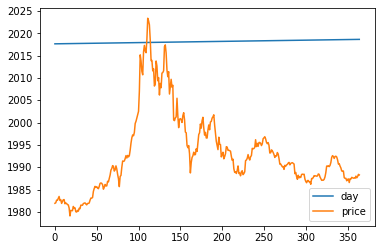

In [8]:
bitcoin_df.plot()
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA ha

<AxesSubplot:>

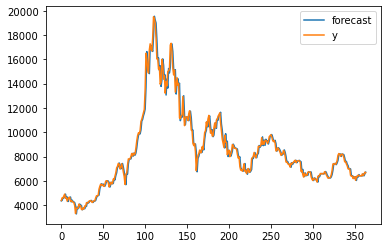

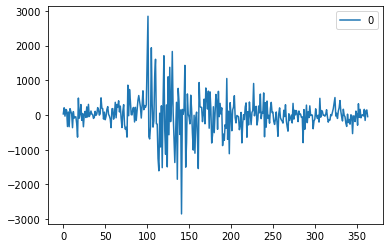

In [9]:
# arima 모델 학습
# order = (2,1,2)
# 2 => ar 2번째 과거까지 알고리즘에 넣음
# 1 => difference 차분 정보, 현재상태 - 바로 이전의 상태 뺀값
#         시계열 데이터의 불규칙성을 파악 => 비트코인 ^^
# 2 => ma 2번째 과거정보오차를 이용해서 현재를 추론

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 출력
risiduals = pd.DataFrame(model_fit.resid)# 잔차의 변동을 시각화
risiduals.plot()

In [11]:
# 실제데이터와 비교
# 이후 5일 정보 예측
forecast_data = model_fit.forecast(steps=5)
forecast_data
# 1 번 배열 : 예측값, 5일차 예측값
# 2 번 배열 : 표준오차, 5일차 예측값
# 3 번 배열 : 5개 배열 [예측데이터 하한값, 예측데이터 상한값]

(array([6676.91689529, 6685.04884511, 6690.29837254, 6697.35159419,
        6703.26452567]),
 array([ 512.41529746,  753.50414112,  914.97749885, 1061.45286959,
        1184.4382798 ]),
 array([[5672.60136715, 7681.23242343],
        [5208.20786632, 8161.8898239 ],
        [4896.97542813, 8483.62131695],
        [4616.94219851, 8777.76098987],
        [4381.80815535, 9024.720896  ]]))

In [12]:
# 실데이터 읽어오기
test_file_path = 'market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds','y'], header=0)

In [13]:
# 예측값을 pred_y 변수에 리스트로 저장 // 원래 튜플
pred_y = forecast_data[0].tolist()
pred_y

[6676.9168952924865,
 6685.048845109902,
 6690.298372539306,
 6697.35159419041,
 6703.2645256732285]

In [14]:
# 실제값을 test_y 변수에 리스트로 저장하기
test_y = bitcoin_test_df['y'].values
test_y
pred_y_lower = [] # 최소 예측값
pred_y_upper = [] # 최대 예측값


In [15]:
for low_up in forecast_data[2] :
    pred_y_lower.append(low_up[0])
    pred_y_upper.append(low_up[1])
    
pred_y_lower

[5672.601367152579,
 5208.207866318599,
 4896.975428126821,
 4616.942198505993,
 4381.808155348637]

In [16]:
pred_y_upper

[7681.232423432394,
 8161.889823901204,
 8483.62131695179,
 8777.760989874827,
 9024.72089599782]

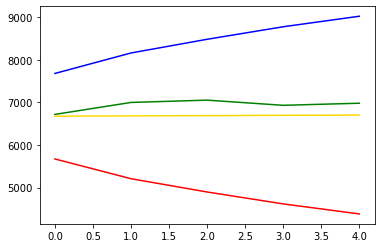

In [17]:
# 시각화
plt.plot(pred_y, color='gold') # 예측값
plt.plot(test_y, color='green') # 실제값 => 변동성있는 편
plt.plot(pred_y_lower, color='red') # 예측 최소값
plt.plot(pred_y_upper, color='blue') # 예측 최대값

In [18]:
# 시계열 데이터 분석을 위한 모델

# ar (자기회귀분석모델)
그냥시간이 들어가서 연속적인 => 주가분석 등
현재 자신과 과거의 자신을 비교, 관계
ar(n) => n 이전의 시점

# ma 이동평균모델
과거와 현재의 오차의 관계

# 합쳐서 자기회귀 이동모델
arma(자기회귀 이동평균 모델)
현재시점의 나와 과거시점의 나를 비교
현재시점의 차이를 비교

# arima 자기회귀 누적 이동평균 모델
ma 누적차수 ar 누적차수 동시에
현재와 추세간의 관계 정의 
arma는 규칙적인 시계열데이터는 가능하지만 불규칙적인 시계열에 불리, 한계
보완하기위한 모델이다

# arima(p, d, q)
p : ar 모형 차수
d : 차분 : 차이
q : ma 모형 차수
    # p+q가 짝수인게 좋다

SyntaxError: invalid syntax (<ipython-input-18-4f6256cf9ffa>, line 4)

In [2]:
# 페이스북 시계열 알고리즘 prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
file_path = 'market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'], header=0)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      365 non-null    object 
 1   y       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [3]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True, # 연별
                 weekly_seasonality = True, # 주별
                 daily_seasonality = True, # 일별
                 changepoint_prior_scale = 0.5) # 과적합 방지 0.5만큼 만 분석
prophet.fit(bitcoin_df) # 학습하기

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


pip install pystan --upgrade

In [4]:
# 5일 앞을 예측하기
future_data = prophet.make_future_dataframe(periods=5, freq='d')
# 예측
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,473.569120,3776.764014,5104.491150,473.569120,473.569120,9.563964,9.563964,9.563964,8.356854,...,-0.038472,-0.038472,-0.038472,-1.168637,-1.168637,-1.168637,0.0,0.0,0.0,4431.117317
1,2017-08-28,476.933144,3833.197375,5183.393019,476.933144,476.933144,9.563964,9.563964,9.563964,8.436224,...,-0.006602,-0.006602,-0.006602,-1.121138,-1.121138,-1.121138,0.0,0.0,0.0,4500.447825
2,2017-08-29,480.297167,3877.729283,5211.107968,480.297167,480.297167,9.563964,9.563964,9.563964,8.494301,...,0.019974,0.019974,0.019974,-1.089637,-1.089637,-1.089637,0.0,0.0,0.0,4560.085805
3,2017-08-30,483.661190,3954.539662,5206.571586,483.661190,483.661190,9.563964,9.563964,9.563964,8.440425,...,-0.046634,-0.046634,-0.046634,-1.076905,-1.076905,-1.076905,0.0,0.0,0.0,4565.966993
4,2017-08-31,487.025213,3931.103385,5269.222802,487.025213,487.025213,9.563964,9.563964,9.563964,8.461194,...,-0.017649,-0.017649,-0.017649,-1.085122,-1.085122,-1.085122,0.0,0.0,0.0,4607.839822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,738.543896,6218.124910,7629.182104,738.543896,738.543896,9.563964,9.563964,9.563964,8.374726,...,-0.006602,-0.006602,-0.006602,-1.182636,-1.182636,-1.182636,0.0,0.0,0.0,6923.647020
366,2018-08-28,742.612648,6338.876532,7721.930490,742.612648,742.612648,9.563964,9.563964,9.563964,8.452304,...,0.019974,0.019974,0.019974,-1.131634,-1.131634,-1.131634,0.0,0.0,0.0,7019.400574
367,2018-08-29,746.681400,6371.510730,7768.115586,746.681400,752.202325,9.563964,9.563964,9.563964,8.421478,...,-0.046634,-0.046634,-0.046634,-1.095851,-1.095851,-1.095851,0.0,0.0,0.0,7034.842537
368,2018-08-30,750.750152,6374.620387,7883.157582,748.285679,770.190606,9.563964,9.563964,9.563964,8.468117,...,-0.017649,-0.017649,-0.017649,-1.078198,-1.078198,-1.078198,0.0,0.0,0.0,7108.190099


In [5]:
forecast_data.shape

(370, 22)

In [6]:
# 예측된 데이터의 날짜 , 예측값, 최소 예측값, 최대 예측값
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6923.647020,6218.124910,7629.182104
366,2018-08-28,7019.400574,6338.876532,7721.930490
367,2018-08-29,7034.842537,6371.510730,7768.115586
368,2018-08-30,7108.190099,6374.620387,7883.157582
369,2018-08-31,7184.990775,6440.287682,7941.401382


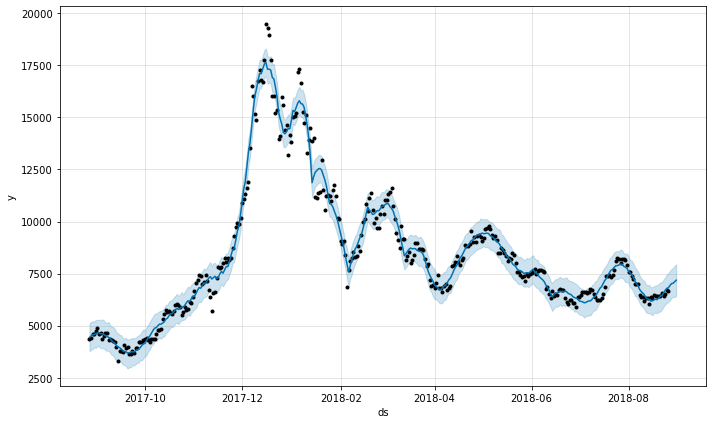

In [7]:
# 결과 시각화
fig1 = prophet.plot(forecast_data)
# 검은점 : 실데이터
# 파란선 : 예측값

C:\Users\pc\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


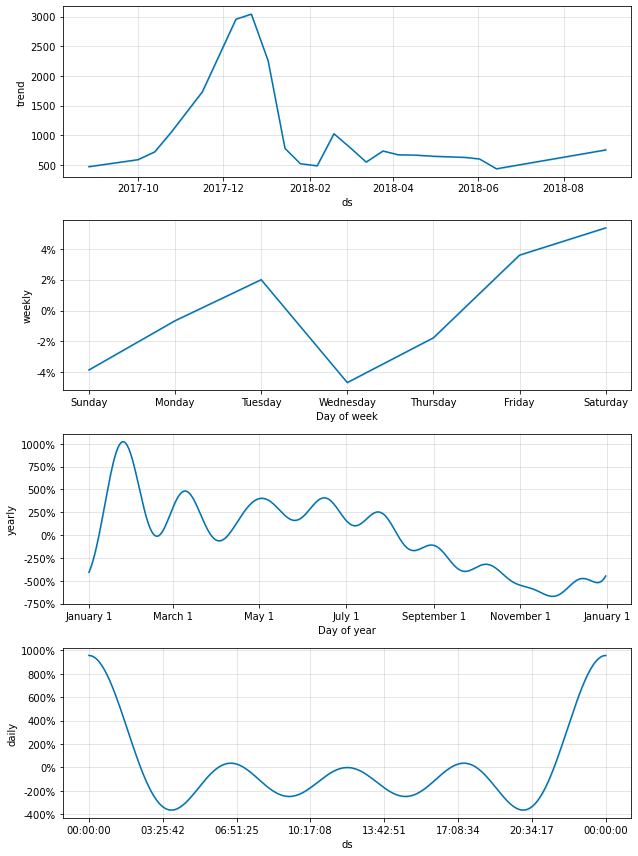

In [8]:
fig2 = prophet.plot_components(forecast_data)
# 4개의 데이터
# 원 데이터
# 주별
# 연별
# 시간별

In [9]:
# 예측이니 성능 분석도 해야함 
# 실제값 - 예측값 
y = bitcoin_df.y.values[5:] # 실데이터, 첫5일제외, 
y_pred = forecast_data.yhat.values[5:-5] #첫5일, 막5일 제외한 예측데이터

In [10]:
# r2score rmse
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
r2 = r2_score(y, y_pred)
r2

0.9737786665877044

In [11]:
rmse = sqrt(mean_squared_error(y, y_pred))
rmse

522.2899311292591

In [41]:
# 실데이터와 비교
test_file_path = 'market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds','y'], header=0)
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [42]:
y = bitcoin_test_df.y.values
y

array([6719.26615385, 7000.04      , 7054.27642857, 6932.6625    ,
       6981.94615385])

In [43]:
y_pred = forecast_data.yhat.values[-5:]
y_pred 

array([6923.64702007, 7019.40057427, 7034.84253693, 7108.19009905,
       7184.99077545])

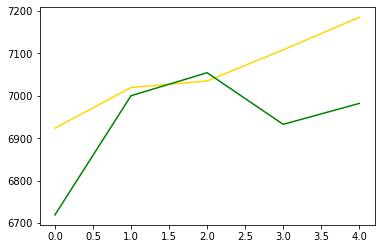

In [44]:
plt.plot(y_pred, color = 'gold')
plt.plot(y, color = 'green')